## 데이터 가져오기

In [5]:
!pip install kaggle --upgrade

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
!pip show kaggle

Name: kaggle
Version: 1.6.14
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [7]:
!kaggle config view

Configuration values from /Users/yoonsjin/.kaggle
- username: seojin0911
- path: None
- proxy: None
- competition: None


In [8]:
!pip show kaggle

Name: kaggle
Version: 1.6.14
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [9]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 98%|█████████████████████████████████████▎| 50.0M/50.9M [00:07<00:00, 7.95MB/s]
100%|██████████████████████████████████████| 50.9M/50.9M [00:07<00:00, 7.41MB/s]


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import shutil

filename='quality-prediction-in-a-mining-process.zip'
extrac_dir='quality-prediction-in-a-mining-process'
archive_format='zip'
shutil.unpack_archive(filename, extrac_dir, archive_format)

/Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
import os
os.listdir('quality-prediction-in-a-mining-process')

['MiningProcess_Flotation_Plant_Database.csv']

In [4]:
data=pd.read_csv('quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv')

In [5]:
for col in data.columns:
    if col!='date':
        data[col]=data[col].str.replace(',','')
        data[col]=data[col].astype('float64')

## 데이터 이해를 위한 탐색

In [55]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,552.0,1698.0,301953.0,557434.0,395713.0,100664.0,174.0,249214.0,253235.0,...,250884.0,457396.0,432962.0,424954.0,443558.0,502255.0,44637.0,523344.0,6691.0,131.0
1,2017-03-10 01:00:00,552.0,1698.0,302441.0,563965.0,397383.0,100672.0,174.0,249719.0,250532.0,...,248994.0,451891.0,42956.0,432939.0,448086.0,496363.0,445922.0,498075.0,6691.0,131.0
2,2017-03-10 01:00:00,552.0,1698.0,304346.0,568054.0,399668.0,10068.0,174.0,249741.0,247874.0,...,248071.0,45124.0,468927.0,43461.0,449688.0,484411.0,447826.0,458567.0,6691.0,131.0
3,2017-03-10 01:00:00,552.0,1698.0,304736.0,568665.0,397939.0,100689.0,174.0,249917.0,254487.0,...,251147.0,452441.0,458165.0,442865.0,44621.0,471411.0,43769.0,427669.0,6691.0,131.0
4,2017-03-10 01:00:00,552.0,1698.0,303369.0,558167.0,400254.0,100697.0,174.0,250203.0,252136.0,...,248928.0,452441.0,4529.0,450523.0,45367.0,462598.0,443682.0,425679.0,6691.0,131.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [16]:
data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,...,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05
mean,5181.706806,1327.562731,1.339406e+12,2.161316e+11,6.245448e+11,1.909239e+09,1.403892e+09,3.549008e+10,4.402292e+10,4.028435e+10,...,2.475333e+10,4.358469e+11,5.218964e+11,6.399874e+11,2.280960e+11,2.101705e+11,2.204856e+11,1.990718e+11,3.028853e+10,2.751787e+09
std,1569.314561,770.563429,4.951147e+12,8.669256e+11,1.438920e+12,1.304149e+10,4.430002e+09,2.617307e+11,2.955984e+11,2.896449e+11,...,2.640849e+11,1.795397e+12,1.871729e+12,2.210399e+12,1.090460e+12,1.099108e+12,1.109635e+12,1.025817e+12,1.346026e+11,1.029048e+10
min,56.000000,18.000000,1.100000e+02,2.490000e+02,3.770000e+02,1.000000e+01,1.600000e+01,1.990000e+02,1.940000e+02,1.990000e+02,...,2.400000e+02,1.630000e+02,2.260000e+02,1.300000e+02,1.750000e+02,2.510000e+02,1.650000e+02,2.350000e+02,6.300000e+01,1.000000e+00
25%,5162.000000,626.000000,2.393270e+05,4.272620e+05,3.952740e+05,1.020920e+05,1.650170e+05,2.500530e+05,2.492920e+05,2.499290e+05,...,2.505780e+05,4.043530e+05,4.265630e+05,4.015530e+05,3.470960e+05,3.486930e+05,3.463910e+05,3.462670e+05,6.421000e+03,1.310000e+02
50%,5579.000000,1332.000000,3.403510e+05,5.090330e+05,4.002460e+05,9.433350e+05,1.703170e+05,2.992670e+05,2.953130e+05,2.985210e+05,...,2.985280e+05,4.799190e+05,4.919270e+05,4.804950e+05,4.053970e+05,4.006120e+05,4.080160e+05,4.025630e+05,6.522000e+03,1.860000e+02
75%,5972.000000,1901.000000,4.352380e+05,5.631490e+05,4.061070e+05,9.756950e+05,1.739940e+05,3.001460e+05,3.006830e+05,3.003670e+05,...,3.016210e+05,5.919140e+05,5.971840e+05,6.005830e+05,4.861880e+05,4.787370e+05,4.895760e+05,4.737560e+05,6.595000e+03,2.940000e+02
max,6578.000000,3223.000000,6.295131e+13,7.394000e+12,4.186254e+12,1.080805e+11,1.853239e+10,3.724426e+12,3.690073e+12,3.620642e+12,...,3.699183e+12,8.622205e+12,8.284389e+12,8.868202e+12,6.800200e+12,6.755715e+12,6.986233e+12,6.596583e+12,6.608867e+11,5.529797e+10


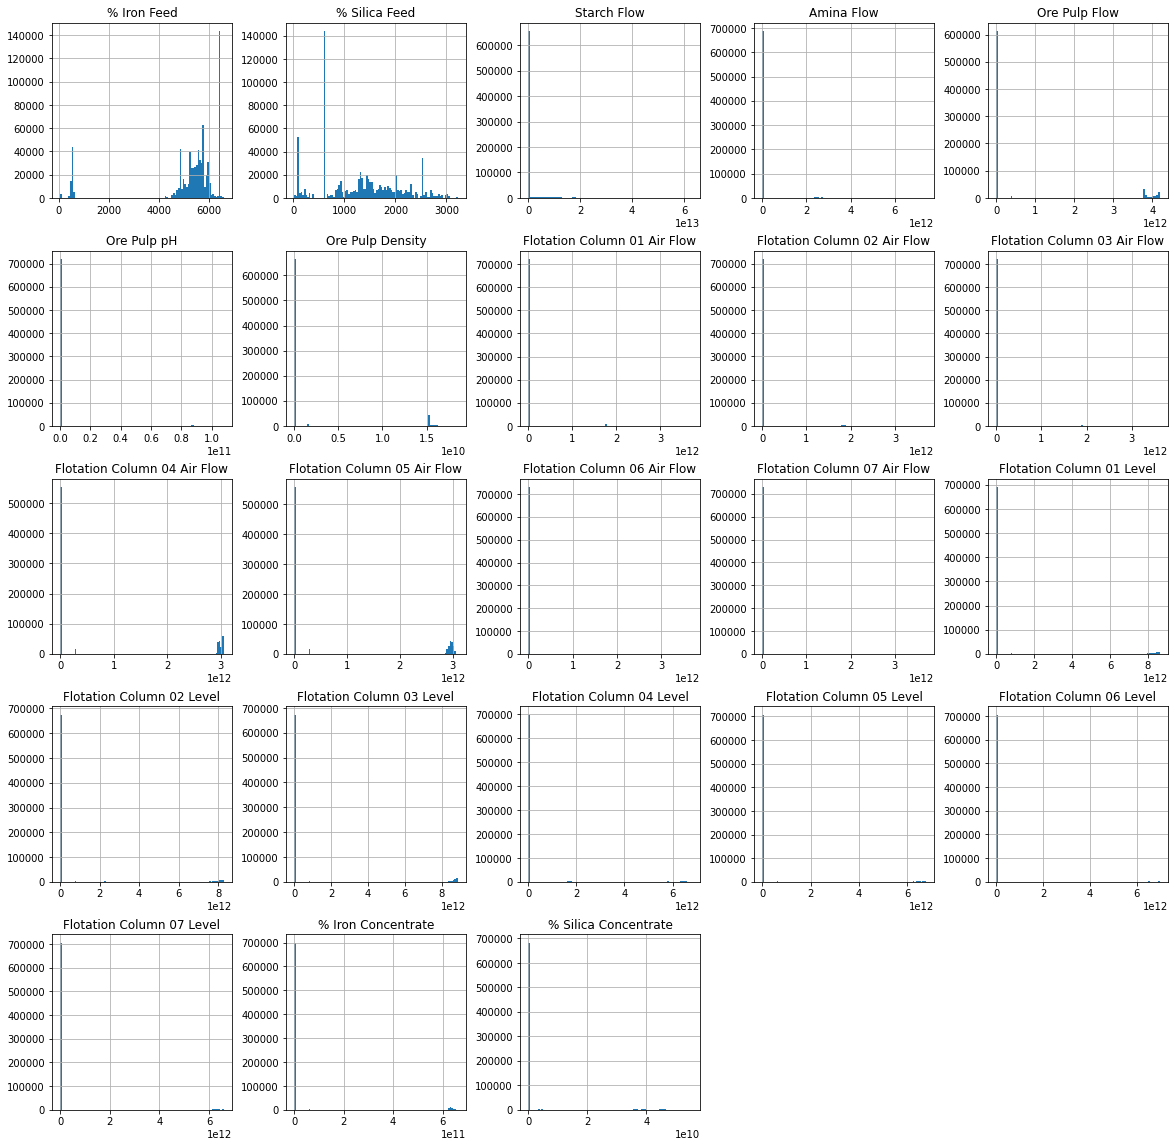

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=100, figsize=(20,20))
plt.show()

## 데이터를 Test set과 Train set으로 나누는 다양한 방법

In [24]:
import numpy as np

#노트북 실행 결과를 일정하게 유지하기 위한 랜덤시드 설정
np.random.seed(42)

#랜덤으로 어떤 샘플을 선택해서 데이터셋을 test_ratio만큼 떼어놓는 함수
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
#데이터의 15퍼센트를 test
train_set, test_set=shuffle_and_split_data(data,0.1)

In [9]:
len(train_set)

663708

In [10]:
len(test_set)

73745

In [12]:
#머신러닝 알고리즘이 전체 데이터셋을 보는 것을 막기 위해 데이터의 hash 값을 이용해 test set 생성하는 함수
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
data_with_id=data.reset_index()

# data_with_id.head()
# data.head()
train_set, test_set=split_data_with_id_hash(data_with_id, 0.1,"index")

<Axes: >

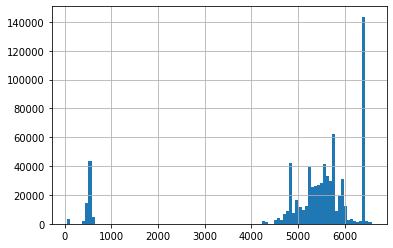

In [14]:
data["% Iron Feed"].hist(bins=100)

In [15]:
data["% Iron Feed cat"]=pd.cut(data["% Iron Feed"],
                              bins=[0.,1000,2000,3000,4000,5000,6000,np.inf],
                              labels=[1,2,3,4,5,6,7])

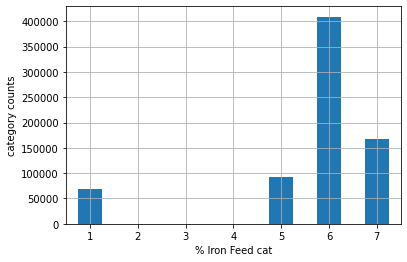

In [16]:
import matplotlib.pyplot as plt
data["% Iron Feed cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("% Iron Feed cat")
plt.ylabel("category counts")
plt.show()

In [17]:
#10개의 계층 분할을 생성해보기
from sklearn.model_selection import StratifiedShuffleSplit

splitter=StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(data, data["% Iron Feed cat"]):
    strat_train_set_n=data.iloc[train_index]
    strat_test_set_n=data.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [18]:
strat_train_set, strat_test_set=strat_splits[0]

In [19]:
#하나의 계층 분할을 생성하기 위한 가장 간단한 방법
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set=train_test_split(
    data, test_size=0.1,stratify=data["% Iron Feed cat"],random_state=42)

In [20]:
strat_test_set["% Iron Feed cat"].value_counts()/len(strat_test_set)

% Iron Feed cat
6    0.554796
7    0.227239
5    0.125702
1    0.092263
2    0.000000
3    0.000000
4    0.000000
Name: count, dtype: float64

In [21]:
#다시 사용하지 않는 특성 삭제

for set_ in (strat_train_set, strat_test_set):
    set_.drop("% Iron Feed cat",axis=1, inplace=True)

## 데이터 이해를 위한 탐색과 시각화

In [62]:
data=strat_train_set.copy()

In [63]:
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
693061,2017-08-30 17:00:00,5564.0,1532.0,27322.0,255821.0,3.802017e+12,8.754460e+10,1.520482e+09,299209.0,299061.0,...,3.073168e+12,398686.0,38774.0,475563.0,405935.0,3.590750e+05,34373.0,339153.0,6.339000e+03,4.070000e+02
513973,2017-07-20 06:00:00,456.0,2992.0,50903.0,609131.0,4.022460e+05,1.014760e+05,1.765980e+05,299048.0,304761.0,...,2.942140e+05,398389.0,466719.0,412756.0,335156.0,3.552540e+05,342196.0,369678.0,6.600000e+01,1.550000e+02
712037,2017-09-04 02:00:00,5414.0,1469.0,261815.0,61688.0,3.851290e+05,9.246260e+05,1.746810e+05,299927.0,304659.0,...,3.714270e+05,419452.0,610717.0,399004.0,330569.0,3.544610e+05,383176.0,348031.0,6.338000e+03,3.830000e+02
540193,2017-07-26 08:00:00,5746.0,108.0,16661407.0,583318.0,4.060810e+05,1.021200e+04,1.735950e+05,297901.0,30128.0,...,2.933350e+05,476495.0,492288.0,506137.0,536619.0,5.385240e+05,530976.0,377783.0,6.568000e+03,1.720000e+02
574282,2017-08-03 05:00:00,5746.0,108.0,344125.0,443728.0,3.798893e+12,1.011030e+05,1.668340e+05,300041.0,298891.0,...,3.503500e+04,406776.0,418462.0,398362.0,320659.0,3.380080e+05,359605.0,373404.0,6.544000e+03,2.080000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120723,2017-04-20 05:00:00,5718.0,1201.0,213818.0,528501.0,4.008310e+05,9.926770e+05,1.708160e+05,251531.0,253312.0,...,2.495580e+05,592277.0,346844.0,618488.0,266023.0,3.660570e+05,394063.0,302894.0,6.494000e+03,3.490000e+02
121989,2017-04-20 12:00:00,5351.0,1652.0,226188.0,508926.0,4.016940e+05,9.858120e+05,1.689110e+05,249648.0,252258.0,...,2.489500e+04,594314.0,551874.0,59875.0,199216.0,1.787093e+12,5663.0,528474.0,6.592000e+03,2.590000e+02
273165,2017-05-25 12:00:00,6403.0,626.0,319825.0,397027.0,3.918740e+05,9.879540e+05,1.613450e+05,298131.0,251437.0,...,3.004920e+05,447543.0,428203.0,447253.0,354695.0,3.289800e+04,284593.0,344426.0,6.502000e+03,1.570000e+02
263039,2017-05-23 04:00:00,6403.0,626.0,295667.0,465348.0,4.056520e+05,1.001570e+05,1.670750e+05,298487.0,29067.0,...,2.997620e+05,30102.0,446315.0,435632.0,418507.0,3.779890e+05,355399.0,35615.0,6.396801e+11,3.041215e+10


In [64]:
#date의 타입을 float으로 변경
from datetime import datetime

for i in range(len(data['date'])):
    data.iloc[i,0]=datetime.strptime(data.iloc[i,0], '%Y-%m-%d %H:%M:%S').timestamp()

# len(data['date'])
print(data.iloc[:,0])

693061    1504080000.0
513973    1500498000.0
712037    1504458000.0
540193    1501023600.0
574282    1501704000.0
              ...     
120723    1492632000.0
121989    1492657200.0
273165    1495681200.0
263039    1495479600.0
723612    1504692000.0
Name: date, Length: 663707, dtype: object


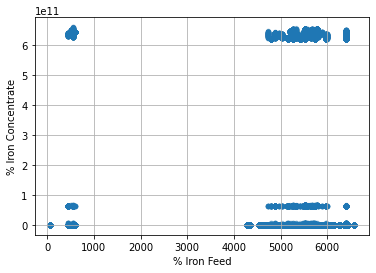

In [90]:
data.plot(kind="scatter", x="% Iron Feed", y="% Iron Concentrate",grid=True, alpha=0.2)
plt.xlabel("% Iron Feed")
plt.ylabel("% Iron Concentrate")
plt.show()

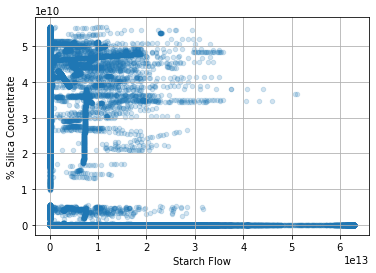

In [97]:
data.plot(kind="scatter", x="Starch Flow", y="% Silica Concentrate",
          grid=True, alpha=0.2)
plt.xlabel("Starch Flow")
plt.ylabel("% Silica Concentrate")
plt.show()

#Strach FLow가 낮을수록 % Silica Concentrate가 높음

In [100]:
#특성간의 상관계수 조사
corr_matrix=data.corr(numeric_only=True)
corr_matrix["% Silica Concentrate"].sort_values(ascending=False)

% Silica Concentrate            1.000000
% Iron Concentrate              0.696572
Flotation Column 05 Air Flow    0.090099
Flotation Column 04 Air Flow    0.087670
Flotation Column 03 Air Flow    0.069186
Flotation Column 03 Level       0.048313
Flotation Column 01 Air Flow    0.041348
Flotation Column 02 Air Flow    0.037001
% Silica Feed                   0.034434
Ore Pulp pH                     0.023538
Flotation Column 01 Level       0.014897
Flotation Column 07 Level       0.007868
Flotation Column 02 Level       0.006378
Flotation Column 06 Level       0.003274
Flotation Column 05 Level       0.001851
% Iron Feed                    -0.002431
Ore Pulp Density               -0.002670
Amina Flow                     -0.003782
Flotation Column 04 Level      -0.006175
Ore Pulp Flow                  -0.007060
Flotation Column 07 Air Flow   -0.007643
Flotation Column 06 Air Flow   -0.023269
Starch Flow                    -0.024894
Name: % Silica Concentrate, dtype: float64

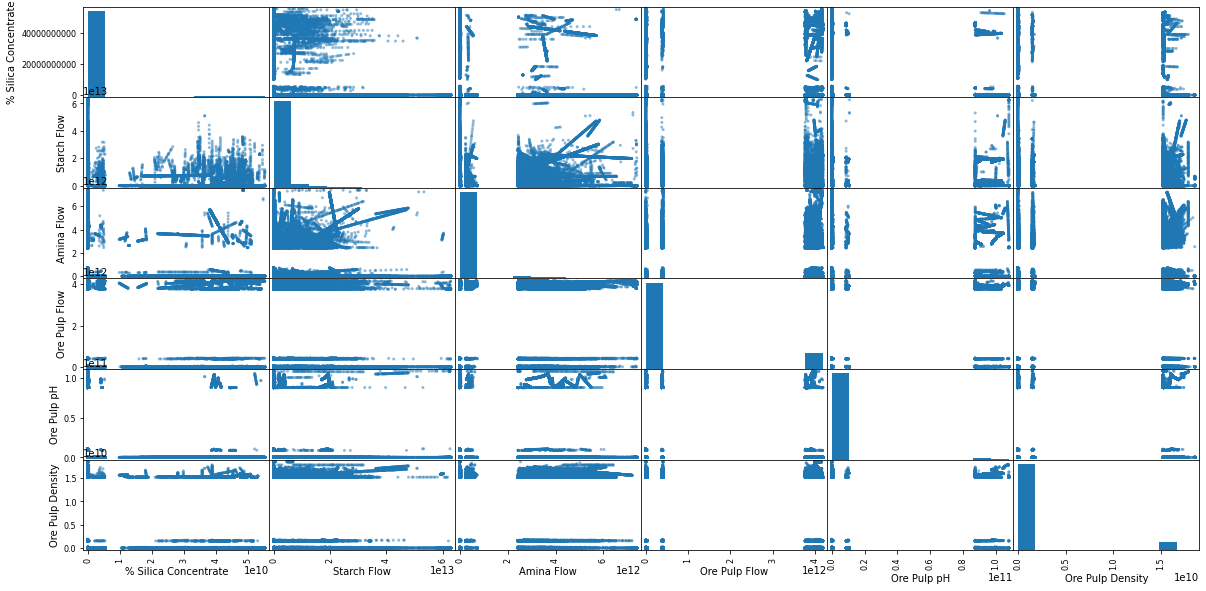

In [106]:
#산점도를 통해 상관관계 파악하기
from pandas.plotting import scatter_matrix

attributes=["% Silica Concentrate","Starch Flow","Amina Flow",
           "Ore Pulp Flow","Ore Pulp pH","Ore Pulp Density"]
scatter_matrix(data[attributes],figsize=(20,10))
plt.show()

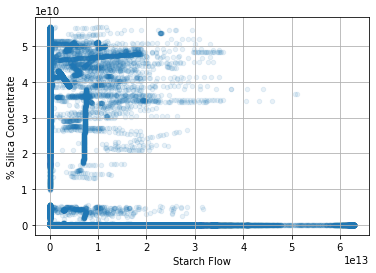

In [108]:
data.plot(kind="scatter",x="Starch Flow",y="% Silica Concentrate", 
         alpha=0.1, grid=True)
plt.show()

## 머신러닝 알고리즘을 위한 데이터 준비

In [109]:
data=strat_train_set.drop("% Silica Concentrate",axis=1)
Silica_labels=strat_train_set["% Silica Concentrate"].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
data_num_min_max_scaled=min_max_scaler.fit_transform(housing)